# PW Final Exam
# 12/1/2023
# By Nédra Mellouli @devinci.fr
ChatGPT is forbidden

Moodle resources are available

# Exercise 1 (10 pts)
Given  blood transfusion dataset, we are lokking to classify between blood donated and not.


1.Load the data from csv with the correct seperator and store it in a dataframe format
1. print the data information

1.   Define the list of input features (as your explanatory variables) and the target features for a classification task
2.   plot  histogramms of the input features and the box plot of your data

1.   Plot the correlation matrix
1.   define a feature_columns variable composed by the name of all the explanatory varaibels

1.  Build a new dataframe called "data" containing only the values associated to feature_columns.
2. Determine the missing data  and plot the rate of missing values by feature.


2. Explain your process  to clean the data  

2. Code your cleaning process
1. Display features distribution for each class and the feature's correlation matrix.
1. Comment the data



   









# Exercise 1 (10 pts)

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1: Load the data
data_path = 'BloodTransfusion (2).csv'
blood_data = pd.read_csv(data_path, sep=';')

# Task 2: Print data information
print(blood_data.info())

# Task 3: Define input and target features
input_features = ['Recency','Frequency','Monetary','Time']
target_feature = 'Class'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Recency    748 non-null    object
 1   Frequency  748 non-null    object
 2   Monetary   748 non-null    object
 3   Time       748 non-null    object
 4   Class      748 non-null    object
dtypes: object(5)
memory usage: 29.3+ KB
None


In order to do the boxplot and the histogram, we need to have the data in a numerical format.

In [74]:
# Convert the features to numerical
blood_data[input_features] = blood_data[input_features].apply(pd.to_numeric, errors='coerce')

#convert the target feature to numeric using a mapping
blood_data[target_feature] = blood_data[target_feature].map({'donated': 1, 'not donated': 0})

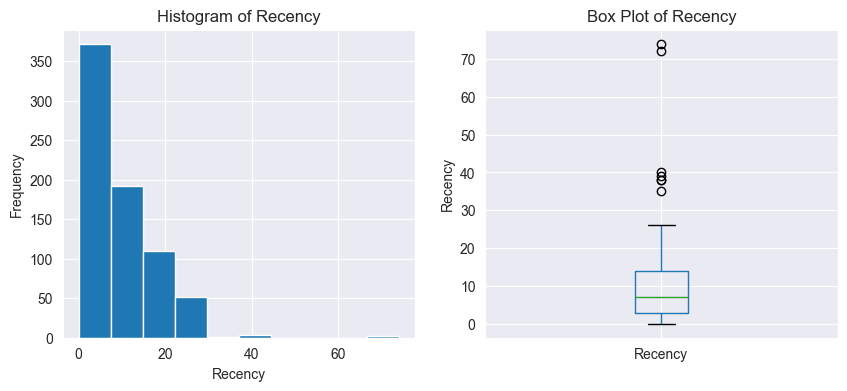

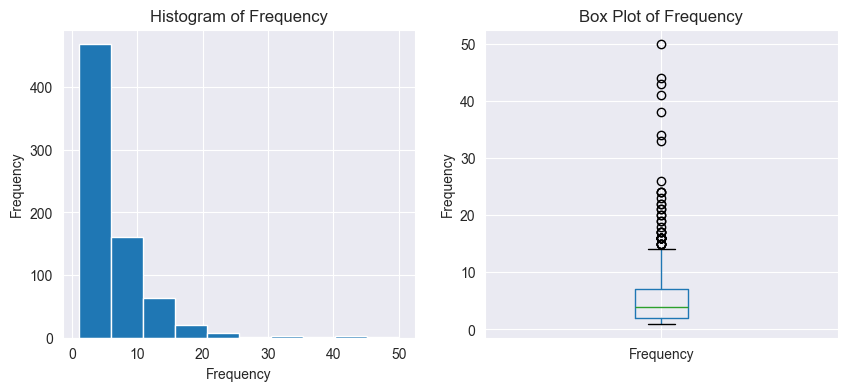

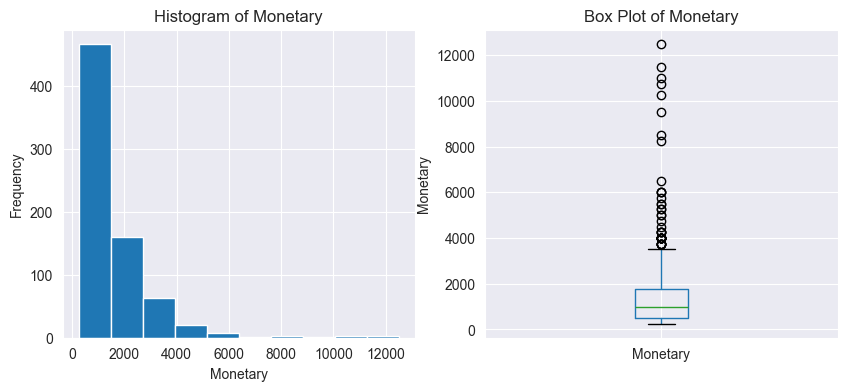

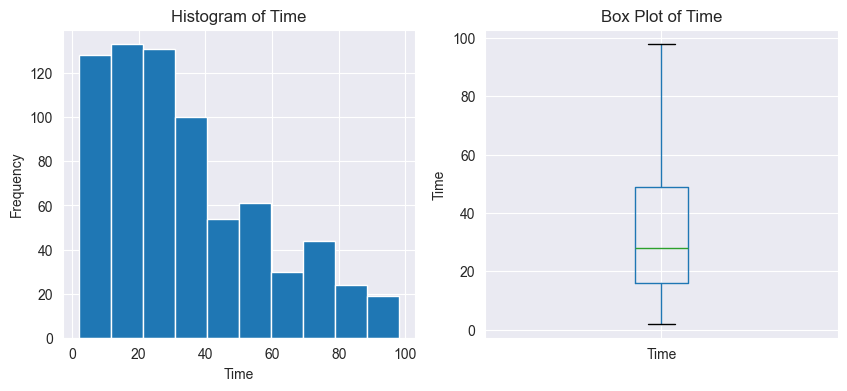

In [75]:
# Task 4: Plot histograms and box plots of input features
for feature in input_features:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    blood_data[feature].hist()
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    blood_data.boxplot(column=[feature])
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)
    plt.show()

From the graphs above, we can see a large presence of outlier values in the data.
We also see the similarity between histograms of monetary and frequency, telling use there may be a big correlation between them.

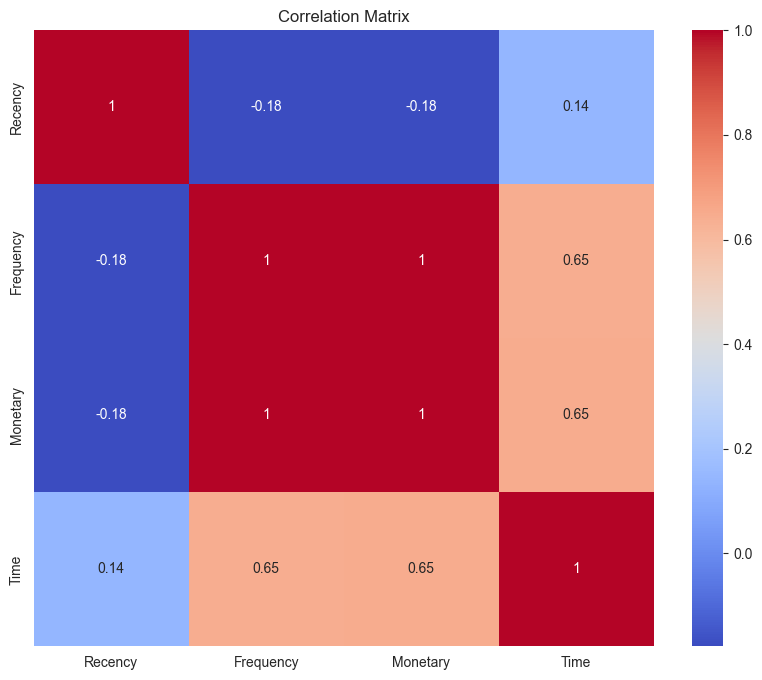

In [76]:
# Task 5: Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(blood_data[input_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Our suspicions of a correlation between frequency and monetary are correct, seeing as they have a correlation of 1. WE also see that these features have a relativly correlation with Time.

In [77]:
# Task 6: Define feature_columns and create a new dataframe
feature_columns = input_features.copy()+[target_feature]
data = blood_data[feature_columns]

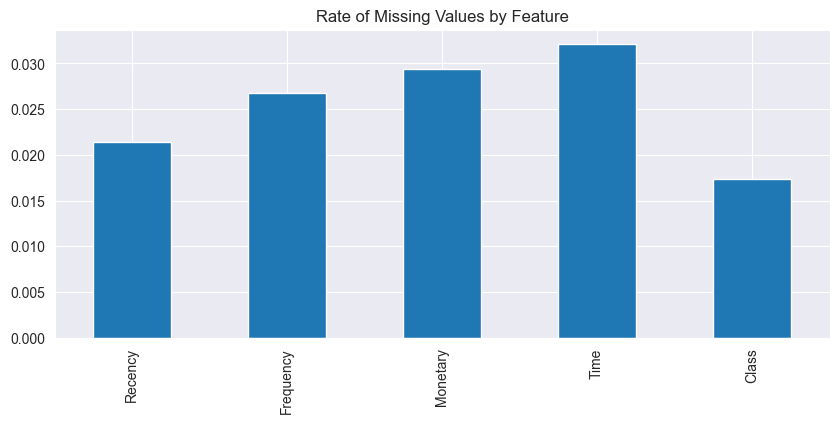

In [78]:
# Task 7: Determine and plot missing data rates
missing_data = data.isnull().mean()
plt.figure(figsize=(10, 4))
missing_data.plot(kind='bar')
plt.title('Rate of Missing Values by Feature')
plt.show()

The average missing values per feature is around 2.3% which is relativly high and needs to be corrected. Erasing this many rows may negativly impact our prediction accuracy.

In [79]:
# Task 8: Print 20 head samples with missing values
print(data[data.isnull().any(axis=1)].head(20))

     Recency  Frequency  Monetary  Time  Class
8        NaN        9.0    2250.0  22.0    1.0
9        5.0        NaN   11500.0  98.0    1.0
11       0.0        3.0       NaN   4.0    0.0
13       1.0        NaN       NaN  47.0    0.0
53       NaN       12.0    3000.0  52.0    0.0
55       4.0       19.0       NaN  69.0    NaN
57       NaN        7.0    1750.0  28.0    1.0
61       NaN        8.0       NaN  35.0    1.0
65       3.0        NaN       NaN  74.0    0.0
66       2.0        NaN       NaN  14.0    1.0
67       0.0        NaN       NaN   4.0    0.0
68       4.0        NaN       NaN  25.0    0.0
69       1.0        NaN       NaN  51.0    0.0
70       2.0        NaN       NaN  16.0    0.0
222      4.0        1.0       NaN   NaN    1.0
223      4.0        1.0       NaN   NaN    0.0
224      4.0        1.0       NaN   NaN    1.0
225      4.0        1.0       NaN   NaN    1.0
226      4.0        1.0       NaN   NaN    0.0
227      4.0        3.0       NaN   NaN    0.0


# Task 9: Explain the data cleaning process
The data cleaning is seperated into a few parts:
1.   The first part is to convert the features to numerical format. This is done by using the `pd.to_numeric` function (already done in the code) for the input features and `.map` for the target features. 
2. The second part is to fill the missing values.
3. The third part is to remove the outliers
4. The fourth part is to normalize the data

Since the data is already in numerical format, we can skip the first part. The second part is done by filling the missing data using the median values for the input data and by removing the rows containing missing target data. 
The third part is done by using a `zscore` , thus limiting the range of outlier values. 
The fourth part is done by using a `MinMaxScaler` , thus normalizing the values for the input data.

In [80]:
# Task 10: Code the data cleaning process
data = data.dropna(subset=['Class'],axis='rows')

for column in input_features:
    median_value = blood_data[column].median()
    data[column].fillna(median_value, inplace=True)
    
    zscore = (data[column] - data[column].mean()) / data[column].std()
    data = data[(zscore < 3) & (zscore > -3)]
    
    data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())
print(data.isna().sum())

Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64


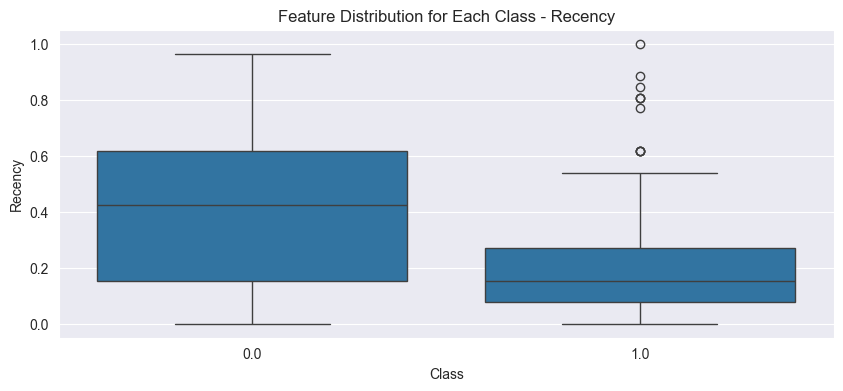

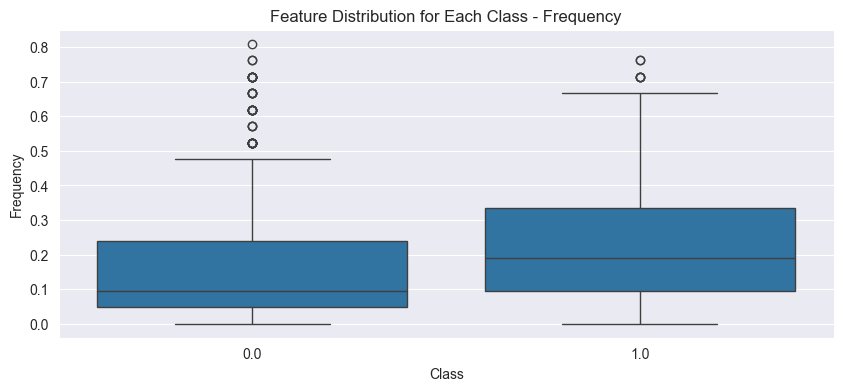

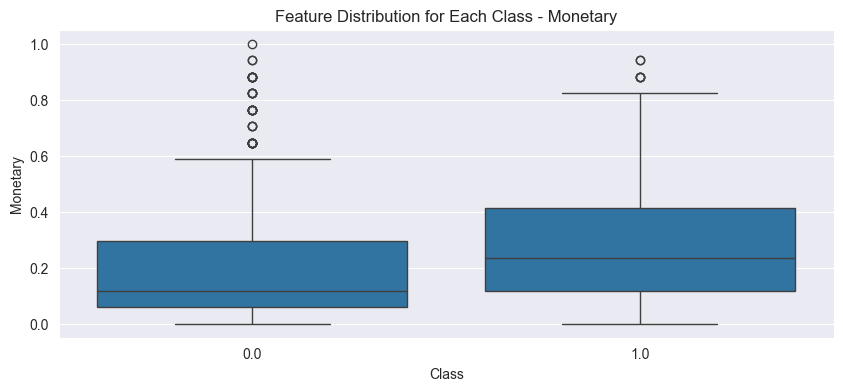

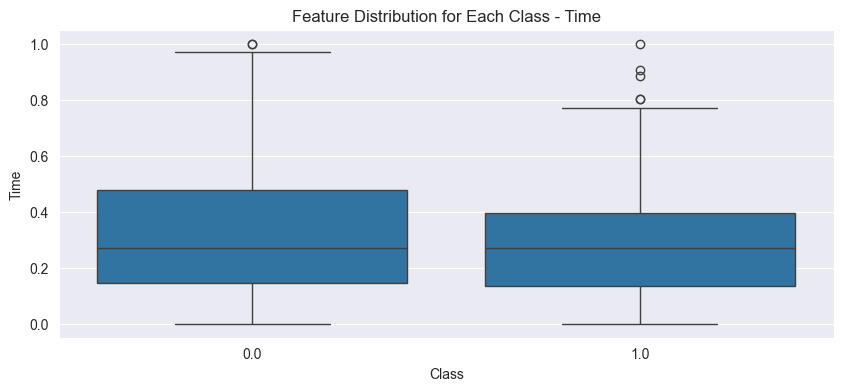

In [81]:
# Task 11: Display features distribution for each class
for feature in input_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=target_feature, y=feature, data=data)
    plt.title(f'Feature Distribution for Each Class - {feature}')
    plt.show()

# Task 12: Comment on the data (this should be a textual commentary)
Despite the correlations between the input feautures, we don't have a clear and visible delimitation to determine the class from the input values. Event though we blocked a lot of the outliers, we still see quite a lot of them, which may negativly influence our modelisation.

# Exercise 2 (10 points)

On the cleaned blood transfusion dataset, we are looking to build a Machine learning model allowing as to distinguish between different classes.

Here are the explanatory features:

*  Recency: the time in months since the last time a person intended to give blood
*   Frequency: the number of time a person intended to give blood in the past

*   Monetary: the amount of blood given in the past
*   Time: the time in months since the first time a person intended to give blood
1.  # Exercise 2 (10 points)

On the cleaned data , we are looking to build a Machine learning model allowing as to distinguish between  categories.



1.   Use a decision tree model  with gini criteria, max_depth=2 after splitting the dataset into 80% for traing and 20% for test.
2.   Evaluate the trained decision tree on the test dataset and display its accuracy
1.Create a second decision tree classifier with a max_depth=2   using the k-fold cross validation. Hint: take 60% data to train model using k-fold cross validation.  
2.  Compute the accuracy of the decision tree on the 40% of the rest of the data  step.
1.   Compute the accuracy of the decision tree on the testing data
2.Plot the tree and select the most impure node at the level 1. Justify your answer
1.   Take the samples belonging to the most impure node and apply a DBSCAN to discover more discrimate properties on these samples, take epsilon=0.5.












In [82]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.cluster import DBSCAN


#Task 1:
X = data[input_features]
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=24)
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2, random_state=42)

In [83]:
# Task 2: Evaluating the accuracy on the test dataset
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Results of Decision Tree Classifier:')
print(f'Accuracy on the test dataset: {accuracy:.3f}')


Results of Decision Tree Classifier:
Accuracy on the test dataset: 0.746


In [84]:
# Task 3: Decision tree with k-fold cross validation
# Splitting the dataset into 60% for k-fold training and 40% for final testing
X_train_kfold, X_final_test, y_train_kfold, y_final_test = train_test_split(
    X, y, test_size=0.4, random_state=24)

# K-fold cross-validation (using 5 folds here)
kfold = KFold(n_splits=5, shuffle=True, random_state=24)
dt_classifier_kfold = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=42)

#Task 4:
# Perform cross-validation and compute the average accuracy
cv_scores = cross_val_score(dt_classifier_kfold, X_train_kfold, y_train_kfold, cv=kfold, scoring='accuracy')
average_cv_accuracy = cv_scores.mean()

#Task 5:
# Training on the entire 60% data for final evaluation on the 40% test data
dt_classifier_kfold.fit(X_train_kfold, y_train_kfold)
y_final_pred = dt_classifier_kfold.predict(X_final_test)
final_test_accuracy = accuracy_score(y_final_test, y_final_pred)
print('Results of Decision Tree Classifier with k-fold cross validation:')
print(f'Average accuracy on the 60% data: {average_cv_accuracy:.3f}')
print(f'Accuracy on the 40% test data: {final_test_accuracy:.3f}')


Results with k-fold cross validation:
Average accuracy on the 60% data: 0.78
Accuracy on the 40% test data: 0.74


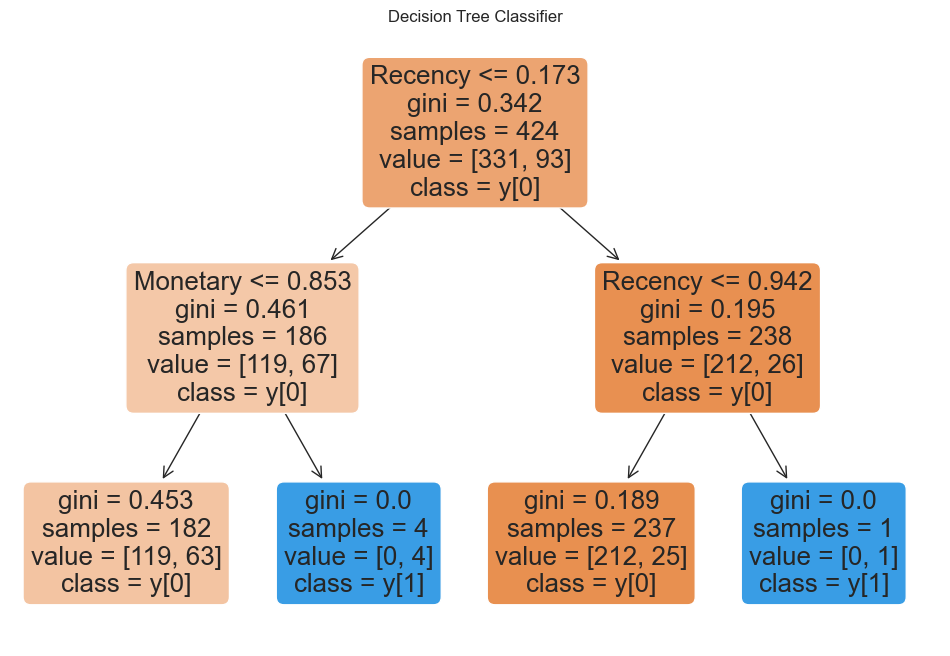

Most impure node at level 1: 1


In [85]:
# Task 6: Plot the tree and select the most impure node at the level 1
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier_kfold, filled=True, feature_names=input_features, class_names=True, rounded=True)
plt.title("Decision Tree Classifier")
plt.show()

def find_most_impure_node_at_level_1(classifier):
    tree = classifier.tree_
    impurity_level_1 = tree.impurity[1:3]
    most_impure_node_index = 1 if impurity_level_1[0] > impurity_level_1[1] else 2
    return most_impure_node_index

most_impure_node = find_most_impure_node_at_level_1(dt_classifier_kfold)
print(f'Most impure node at level 1: {most_impure_node}')

The most impure node at level 1 is the node at index 1 (left child of the root node). This node has a gini impurity of 0.461, which is greater than the gini impurity of the node at index 2 (right child of the root node), which is 0.195.

In [86]:
# Task 7: Apply DBSCAN on the samples belonging to the most impure node 
samples = X_train_kfold[X_train_kfold['Recency']<=0.173]

# Applying DBSCAN on these samples
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(samples)

# Adding the cluster labels to the samples
samples['Cluster'] = clusters

samples.head(500)  # Displaying the first few rows of the samples with their cluster labels


C:\Users\alexs\AppData\Local\Temp\ipykernel_5564\101489386.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samples['Cluster'] = clusters


,Recency,Frequency,Monetary,Time,Cluster
536,0.076923,0.285714,0.352941,0.312500,0
124,0.076923,0.142857,0.176471,0.250000,0
587,0.076923,0.000000,0.000000,0.000000,0
152,0.153846,0.476190,0.588235,0.791667,0
576,0.115385,0.142857,0.176471,0.281250,0
...,...,...,...,...,...
129,0.076923,0.047619,0.058824,0.083333,0
25,0.153846,0.619048,0.764706,0.395833,0
78,0.076923,0.047619,0.058824,0.020833,0
113,0.153846,0.333333,0.411765,0.395833,0
